Objecive
#Build a single layer ANN to predict Sale of ice-cream based on Temperature 

* Parameter used
    Learnig rate: 0.05
    OPtimizer : Adam 
    epochs : 500 
    loss : MSE 
    datarows : 500 
    column : 'Temperature', 'Revenue in $'


In [0]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# load dataset 
data = pd.read_csv('https://raw.githubusercontent.com/shivckr/Dataset/master/original.csv')

In [0]:
data.describe()

In [0]:
def detect_outlier(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  upperrange, lowerrange = [Q3+1.5*IQR, Q1-1.5*IQR]
  return upperrange,lowerrange

  
#find range for Temparture, #find range for revenue 
print(f'outlier Range for temprature {detect_outlier(data.Temperature)}, outlier Range for Revenue {detect_outlier(data.Revenue)}')

In [0]:
sns.scatterplot(x = data.Temperature, y = data.Revenue)

Above scatter plot says 'Temprature' and 'Revenue' are linearly related and dataset is enriched at diff scale 

In [0]:
#split data into train and test
X_train = data.Temperature
y_train = data.Revenue
print(X_train.shape, y_train.shape)

(500,) (500,)


In [0]:
#define mode1
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [0]:
#model summary 
model.summary()

In [0]:
# compile/optimize model 
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.05),loss = 'mean_squared_error')
              

In [0]:
#fit the model on training data
epochs_hist = model.fit(X_train, y_train, epochs= 500 )

In [72]:
model.get_weights()

[array([[21.44968]], dtype=float32), array([44.865646], dtype=float32)]

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [0]:
#make prediction
print(f' Revenue in $ when temperature is  5 degree celsius: {model.predict([5])} ')

# Using sklearn make prediction

In [0]:
X1_train = X_train.values.reshape(-1,1)
y1_train = y_train.values.reshape(-1,1)
print(X1_train.shape, y1_train.shape)

(500, 1) (500, 1)


In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = False)
regressor.fit(X1_train, y1_train)

In [0]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

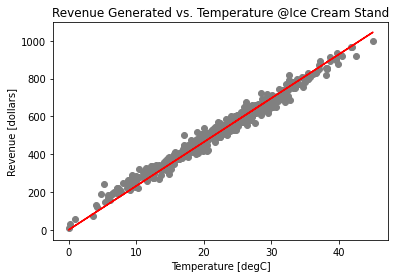

In [0]:
plt.scatter(X1_train, y1_train, color = 'gray')
plt.plot(X1_train, regressor.predict(X1_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')